In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
import torch
from utils.jupyter_utils import get_perclass_count, get_tail_info

In [24]:
# Helper functions
def get_lifted_info(dataset, index_name, threshold):
    count_dict = get_perclass_count(dataset=dataset,
                                    index_dir='indexes/',
                                    index_name=index_name,
                                    verbose=False)
    sorted_classes = count_dict['sorted_classes']
    original = count_dict['train']
    lift_tail = get_perclass_count(dataset=dataset,
                                   index_dir='indexes/',
                                   index_name=index_name+"_lift_tail",
                                   verbose=False)
    lift_random = get_perclass_count(dataset=dataset,
                                     index_dir='indexes/',
                                     index_name=index_name+"_lift_random",
                                     verbose=False)
    tail_class_count, tail_sample_count = get_tail_info(dataset=dataset,
                                                        index_dir='indexes/',
                                                        index_name=index_name,
                                                        threshold=threshold)
    return {
        'sorted_classes': sorted_classes,
        'original': original,
        'lift_tail': lift_tail,
        'lift_random': lift_random,
        'tail_sample_count': tail_sample_count,
        'tail_class_count': tail_class_count,
    }

def get_acc_info(results):
    best_val_epoch = np.argmax(np.array(results['val_acc']))
    best_test_acc = results['test_acc'][best_val_epoch]
    return best_val_epoch, best_test_acc

# Semi-INat Results (Supervised)

In [19]:
dataset = "semi_inat"
index_name = 'default'
threshold = 20

In [20]:
lifted_info = get_lifted_info(dataset, index_name, threshold)

Classes < 20 images: 200
Samples to lift = 1045 images


In [30]:
result_dict = {
    'semi_inat': {
        'default': {
            'inat_supervised': {'result': "checkpoints/supervised/semi_inat/08-31-2022-03:06", 'index_name' : 'default'},
            'inat_supervised_lift_random': {'result': "checkpoints/supervised/semi_inat/08-31-2022-02:29", 'index_name' : 'default'},
            'inat_supervised_lift_tail': {'result': "checkpoints/supervised/semi_inat_lift_tail/08-31-2022-03:06", 'index_name' : 'default_lift_tail'},}
    }
}

In [31]:
file_path = os.path.join(result_dict['semi_inat']['default']['inat_supervised_lift_random']['result'], "results.pth")
print(file_path)
results = torch.load(file_path)
best_val_epoch, best_test_acc = get_acc_info(results)
print(f"Test Acc is {best_test_acc} at epoch {best_val_epoch}")


checkpoints/supervised/semi_inat/08-31-2022-02:29/results.pth
Test Acc is 0.014567901380360126 at epoch 8


In [ ]:
def plot_per_class_accuracy(result_dict, img_num_per_cls, nClasses=100, dataset="semi_inat"):
    result_dict = result_dict[dataset]
    
    for label in models_dict:
        model = models_dict[label]
        acc_per_class = get_per_class_acc(model, dataloaders, nClasses= nClasses, device= device)
        result_dict[label] = acc_per_class

    plt.figure(figsize=(15,4), dpi=64, facecolor='w', edgecolor='k')
    plt.xticks(list(range(100)), labelnames, rotation=90, fontsize=8);  # Set text labels.
    plt.title(f'{dataset} per-class accuracy vs. per-class #images', fontsize=20)
    ax1 = plt.gca()    
    ax2=ax1.twinx()
    for label in result_dict:
        ax1.bar(list(range(100)), result_dict[label], alpha=0.7, width=1, label= label, edgecolor = "black")
        
    ax1.set_ylabel('accuracy', fontsize=16, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=16)

    ax2.set_ylabel('#images', fontsize=16, color='r')
    ax2.plot(img_num_per_cls, linewidth=4, color='r')
    ax2.tick_params(axis='y', labelcolor='r', labelsize=16)
    
    ax1.legend(prop={'size': 14})

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 50})
# Set default figure size.
plt.rcParams['figure.figsize'] = (40, 20)

def plot_bar(height, title, xlabel, ylabel, log_scale=False, mean=None, barcolor="#43C528",
             yticks=[10, 100, 300, 500, 1000, 2000, 5000]):

    fig, ax = plt.subplots()

    # Save the chart so we can loop through the bars below.
    bars = ax.bar(
        x=np.arange(len(height)),
        height=height,
        tick_label=["" for _ in height],
        color=barcolor,
    )

    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False, labelsize=30)
#     plt.xticks(rotation = 90)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    if log_scale:
        ax.set_yscale('log')
    
    if mean:
        ax.axhline(mean, color='g')
    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    yticks = np.array([min(height)] + yticks + [max(height)])
    ax.set_yticks(yticks, minor=False)
    ax.set_yticklabels(yticks, size=40)
    ax.set_xlabel(xlabel, labelpad=15, color='#333333', size=34)
    ax.set_ylabel(ylabel, labelpad=15, color='#333333', size=34)
    ax.set_title(title, pad=15, color='#333333', weight='bold')

    fig.tight_layout()
    plt.show()

In [3]:
def plot_curves(d, title=None, xlabel=None, ylabel=None, log_scale=False, barcolor="#43C528",
                yticks=[]):
    fig, ax = plt.subplots()
    
    for k in d:
        ax.plot(d[k], label=k)
    ax.set_title(title, pad=15, color='#333333', weight='bold')
    ax.set_xlabel(xlabel, labelpad=15, color='#333333', size=34)
    ax.set_ylabel(ylabel, labelpad=15, color='#333333', size=34)
    if log_scale:
        ax.set_yscale('log')
    plt.legend()
    yticks = np.array([min([min(d[k]) for k in d])] + yticks + [max([max(d[k]) for k in d])])
    ax.set_yticks(yticks, minor=False)
    ax.set_yticklabels(yticks, size=40)
    ax.set_xlabel(xlabel, labelpad=15, color='#333333', size=34)
    ax.set_ylabel(ylabel, labelpad=15, color='#333333', size=34)
    ax.set_title(title, pad=15, color='#333333', weight='bold')
    fig.tight_layout()
    plt.show()

In [7]:
def get_perclass_count(train_index_file, val_index_file, test_index_file, unlabeled_index_file, threshold=20):
    
    train_targets = np.array(pd.read_csv(train_index_file)['Target'].tolist())
    val_targets = np.array(pd.read_csv(val_index_file)['Target'].tolist())
    test_targets = np.array(pd.read_csv(test_index_file)['Target'].tolist())
    unlabeled_targets = np.array(pd.read_csv(unlabeled_index_file)['Target'].tolist())

    num_classes = max(test_targets)
    print("Number of class: " + str(num_classes))
    all_targets = np.concatenate((train_targets, val_targets, unlabeled_targets))
    all_perclass_count = [len(np.where(all_targets == i)[0]) for i in range(num_classes)]

    sorted_classes = [item[0] for item in sorted(enumerate(all_perclass_count), key=lambda x: x[1], reverse=True)]

    train_perclass_count = [len(np.where(train_targets == i)[0]) for i in range(num_classes)]
    val_perclass_count = [len(np.where(val_targets == i)[0]) for i in range(num_classes)]
    test_perclass_count = [len(np.where(test_targets == i)[0]) for i in range(num_classes)]
    unlabeled_perclass_count = [len(np.where(unlabeled_targets == i)[0]) for i in range(num_classes)]

    train_perclass_count = [train_perclass_count[idx] for idx in sorted_classes]
    val_perclass_count = [val_perclass_count[idx] for idx in sorted_classes]
    test_perclass_count = [test_perclass_count[idx] for idx in sorted_classes]
    unlabeled_perclass_count = [unlabeled_perclass_count[idx] for idx in sorted_classes]
    print("Unlabeled " + str(len(unlabeled_targets)))
    print("Train " + str(len(train_targets)))
    print("Val " + str(len(val_targets)))
    print("Test " + str(len(test_targets)))

    print("Unlabeled (min)" + str(min(unlabeled_perclass_count)))
    print("Train (min)" + str(min(train_perclass_count)))
    print("Val (min)" + str(min(val_perclass_count)))
    print("Unlabeled (max)" + str(max(unlabeled_perclass_count)))
    print("Train (max)" + str(max(train_perclass_count)))
    print("Val (max)" + str(max(val_perclass_count)))
    print(f"Classes <= {threshold} images: " + str(np.sum(np.array(train_perclass_count) <= threshold)))
    print(f"Classes < {threshold} images: " + str(np.sum(np.array(train_perclass_count) < threshold)))
    return train_perclass_count, val_perclass_count, test_perclass_count, unlabeled_perclass_count

In [9]:
semi_inat_dir = "indexes/semi_inat"
train_index_file = os.path.join(semi_inat_dir, "default", "train.csv")
val_index_file = os.path.join(semi_inat_dir, "default", "val.csv")
unlabeled_index_file = os.path.join(semi_inat_dir, "default", "unlabeled.csv")
test_index_file = os.path.join(semi_inat_dir, "test.csv")

train_perclass_count, val_perclass_count, test_perclass_count, unlabeled_perclass_count = get_perclass_count(
    train_index_file, val_index_file, test_index_file, unlabeled_index_file, threshold=20)

Number of class: 809
Unlabeled 70716
Train 22248
Val 8093
Test 4050
Unlabeled (min)17
Train (min)6
Val (min)3
Unlabeled (max)276
Train (max)87
Val (max)32
Classes <= 20 images: 239
Classes < 20 images: 200


In [10]:
train_perclass_count = np.array(train_perclass_count)

print(np.sum((20-train_perclass_count)[train_perclass_count <= 20]))

1045


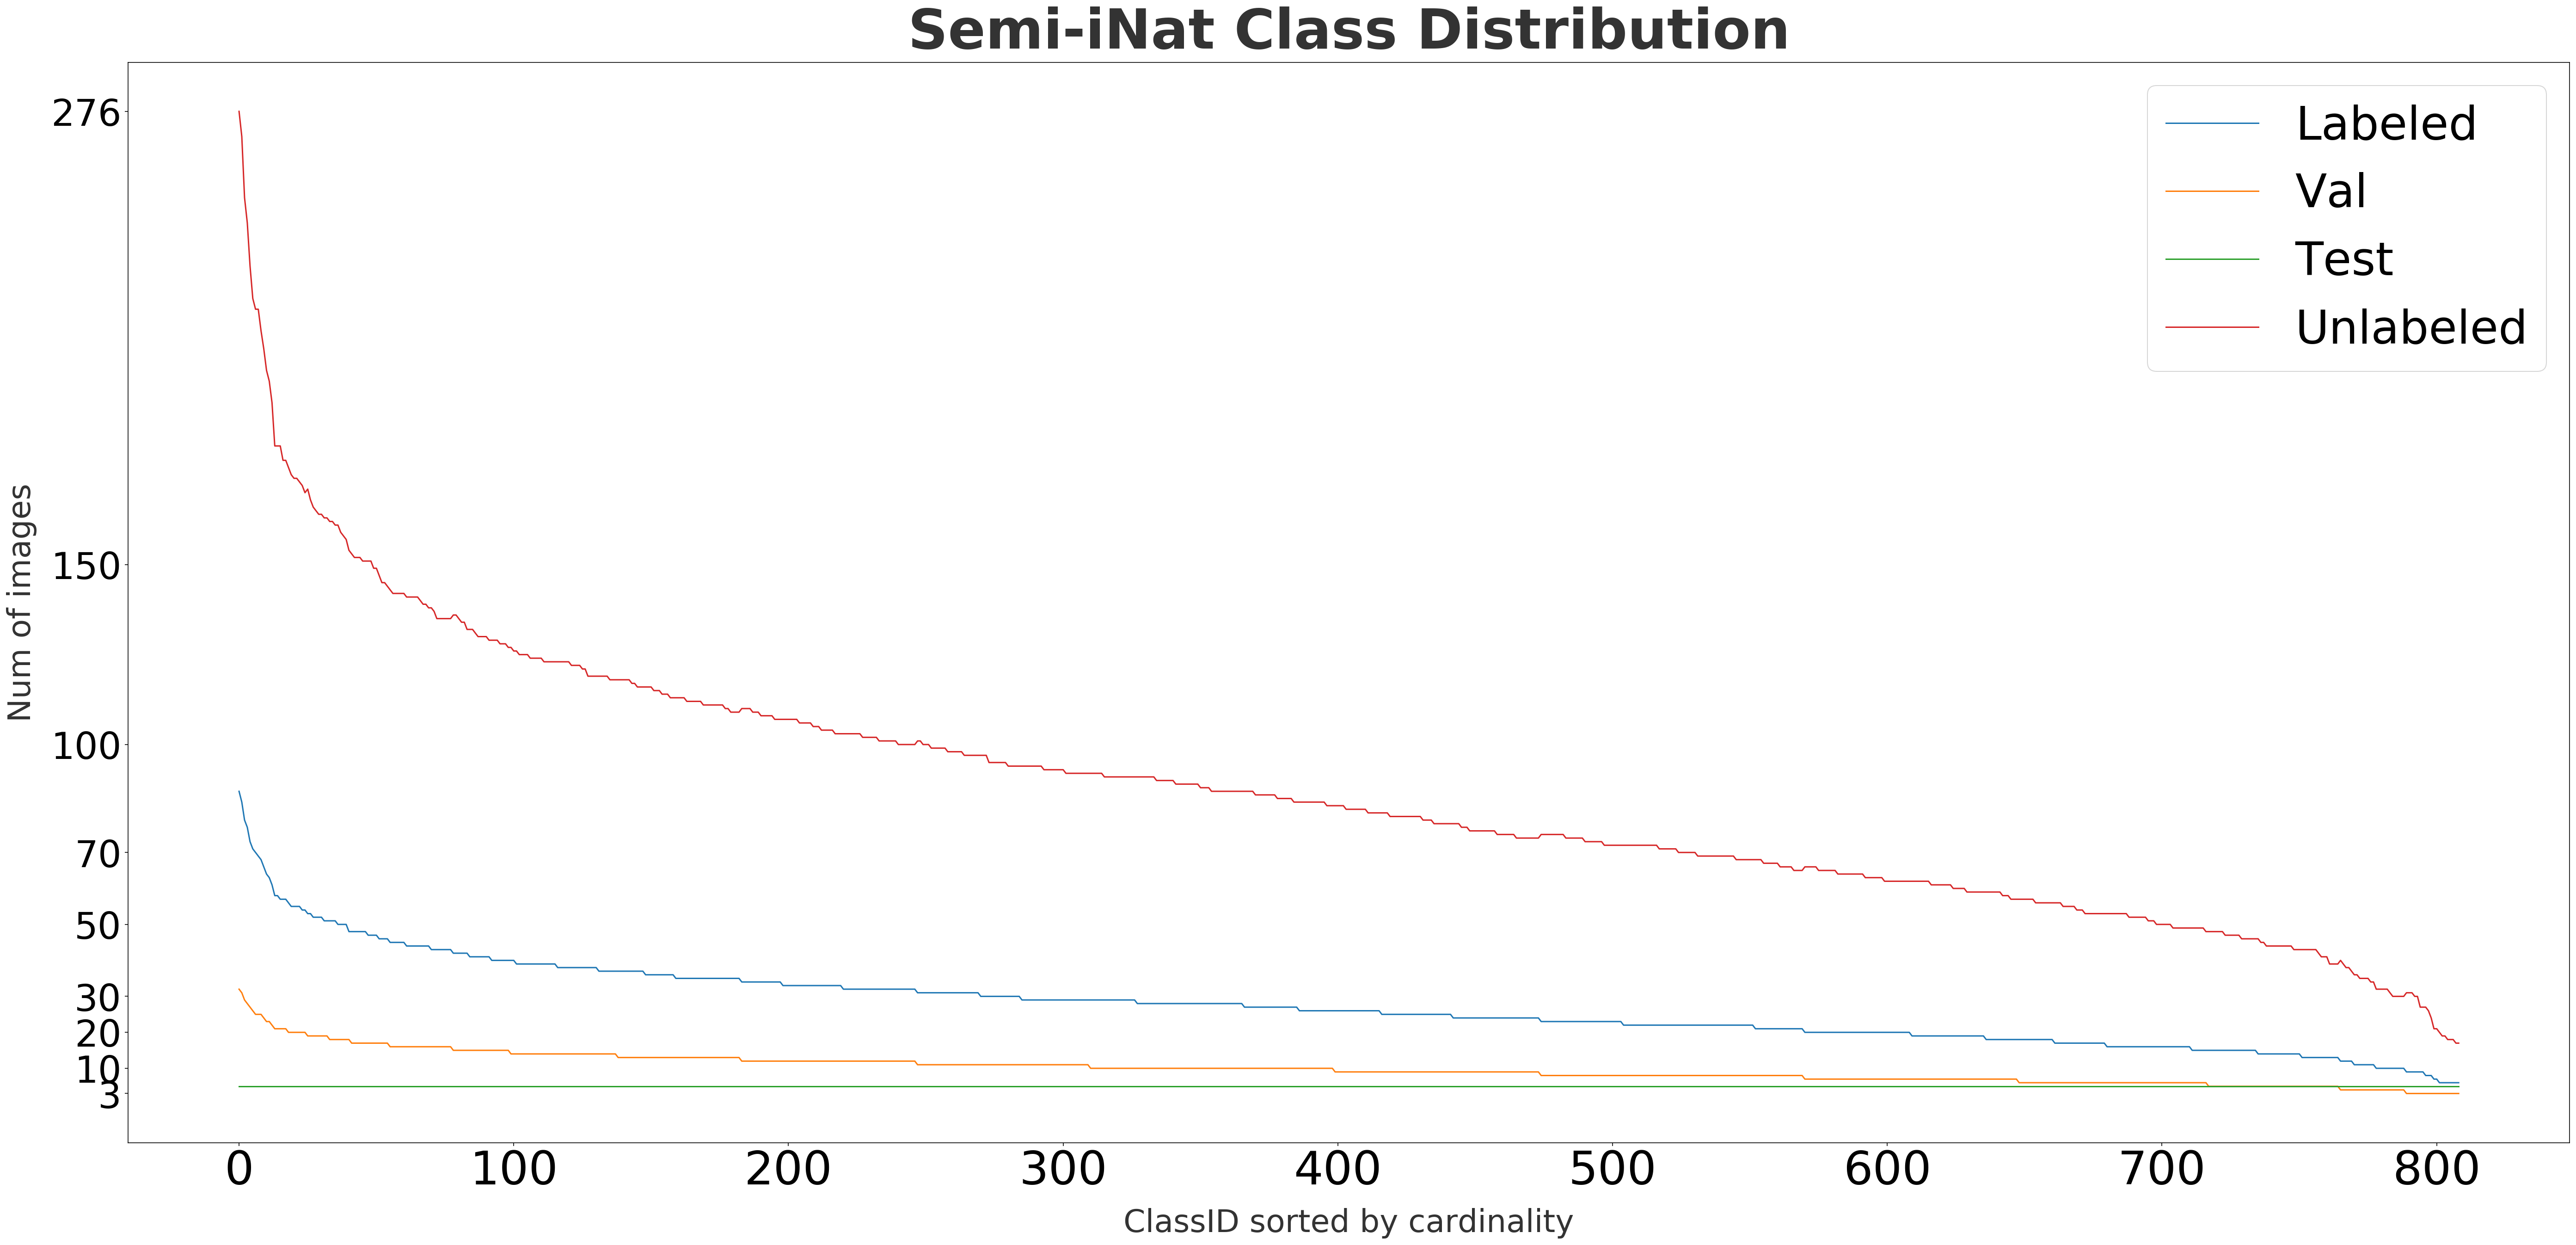

In [11]:
plot_curves({
    'Labeled' : train_perclass_count,
    'Val' : val_perclass_count,
    'Test' : test_perclass_count,
    'Unlabeled' : unlabeled_perclass_count
}, "Semi-iNat Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=False, barcolor="#43C528",
yticks=[10, 20, 30, 50, 70, 100, 150])

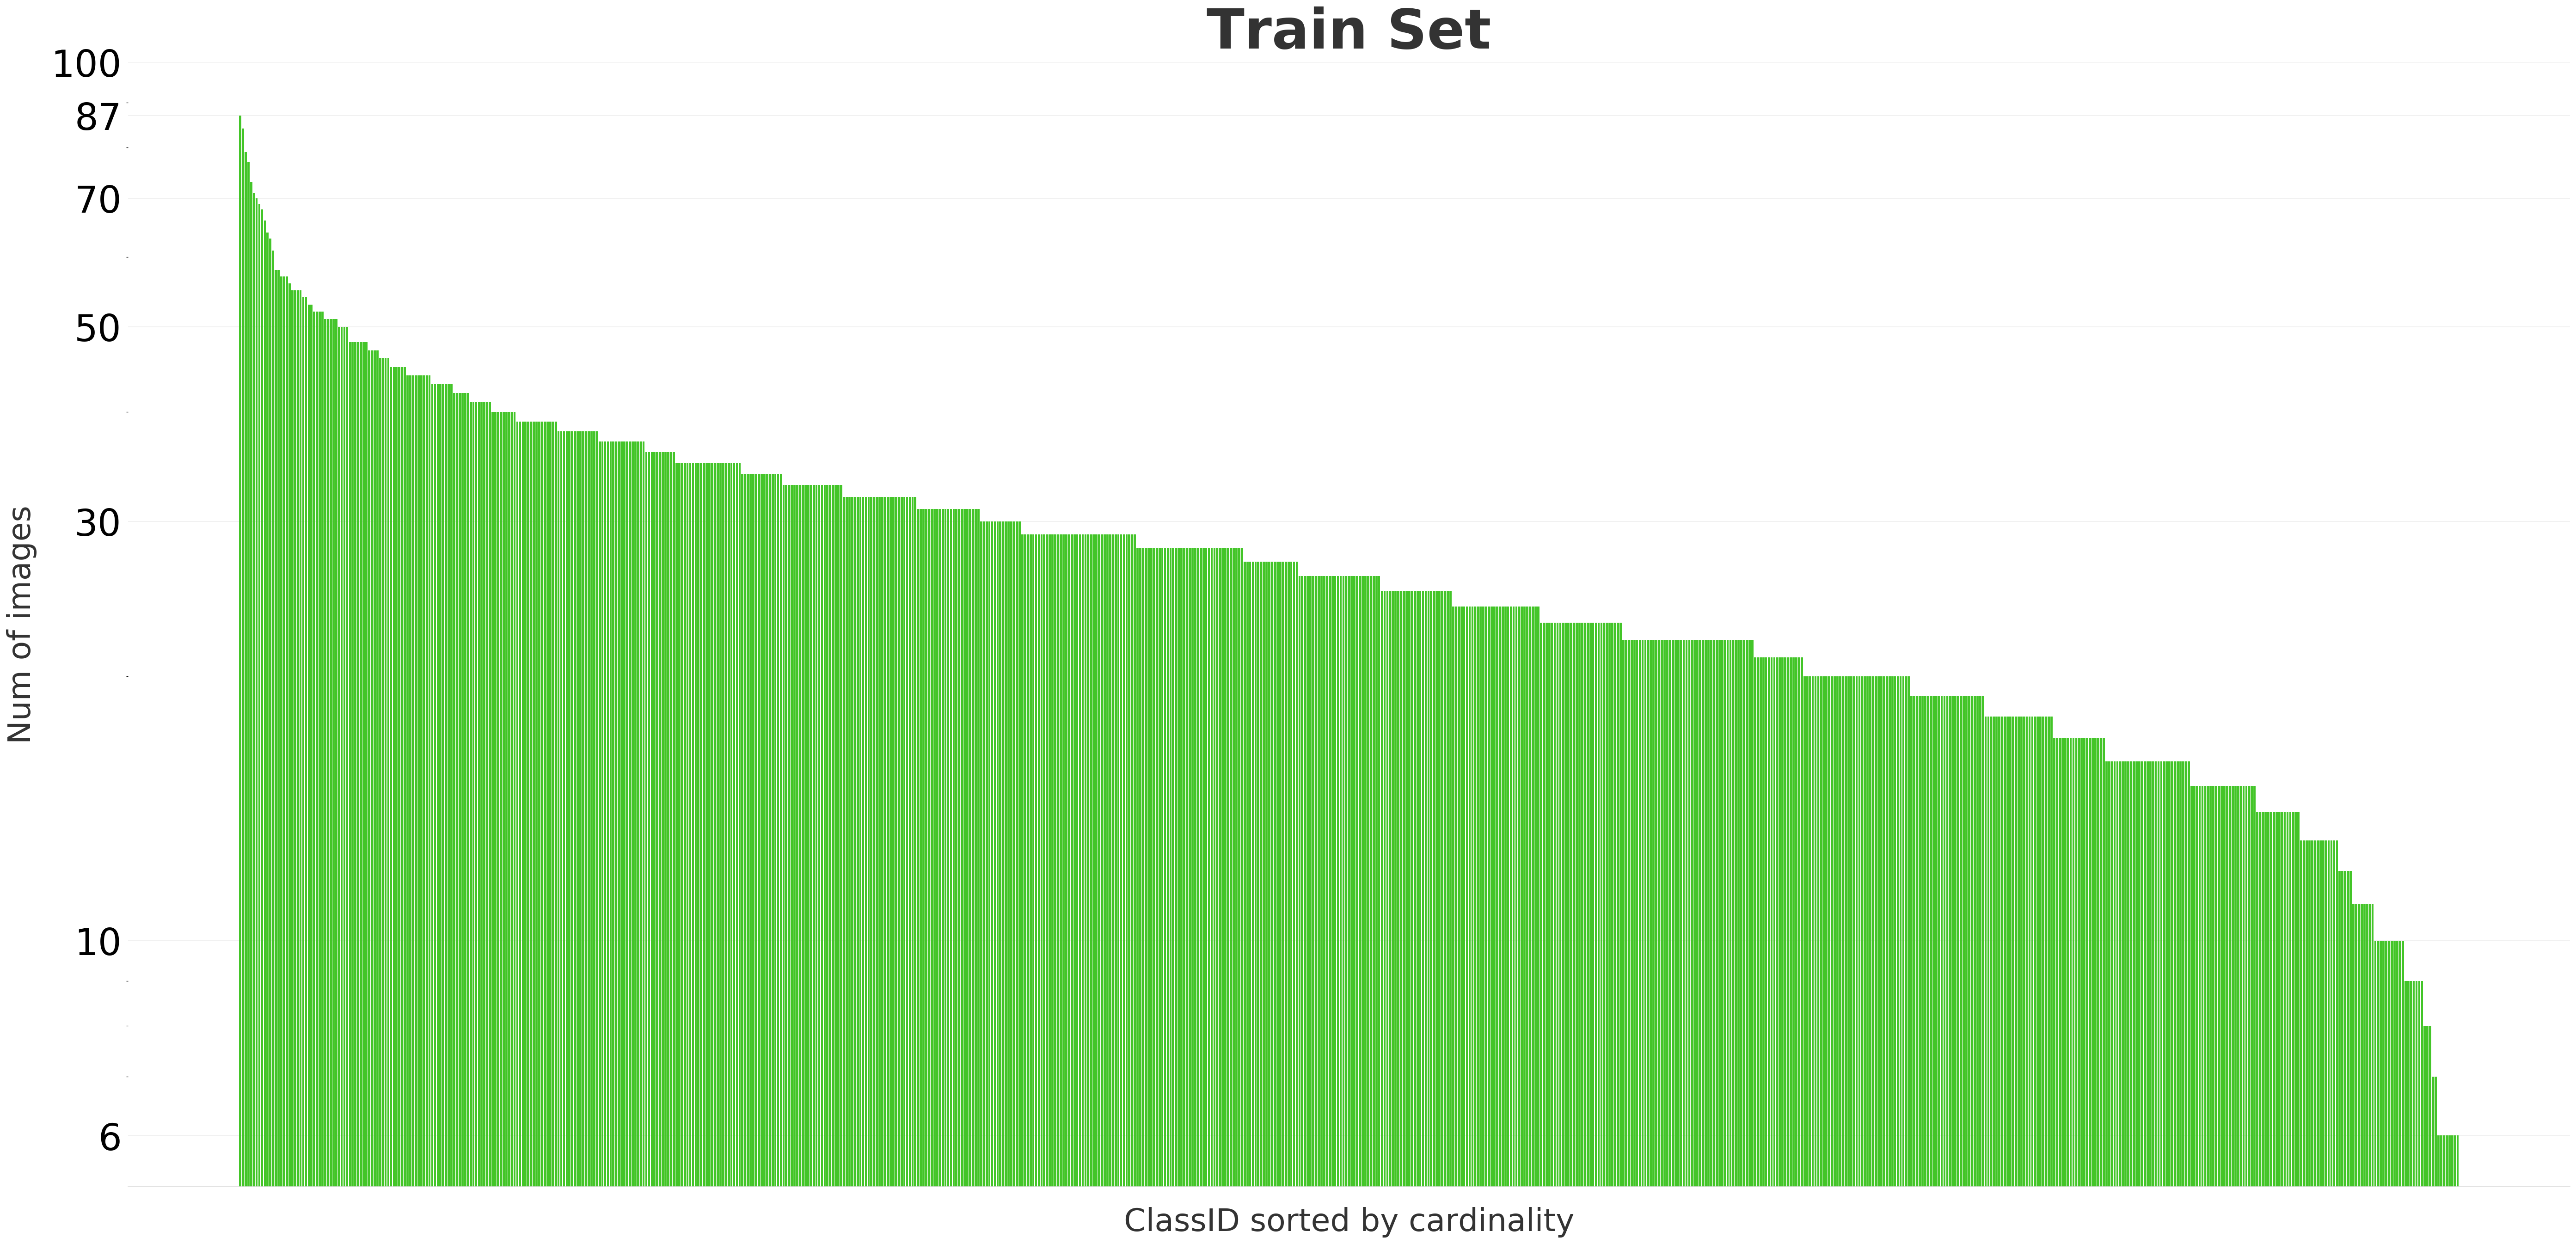

In [12]:
plot_bar(train_perclass_count, "Train Set", "ClassID sorted by cardinality", "Num of images", log_scale=True, barcolor="#43C528",
         yticks=[10, 30, 50, 70, 100])

In [15]:
imagenet127_dir = "indexes/imagenet127"
train_index_file = os.path.join(imagenet127_dir, "default", "train.csv")
val_index_file = os.path.join(imagenet127_dir, "default", "val.csv")
unlabeled_index_file = os.path.join(imagenet127_dir, "default", "unlabeled.csv")
test_index_file = os.path.join(imagenet127_dir, "test.csv")

train_perclass_count, val_perclass_count, test_perclass_count, unlabeled_perclass_count = get_perclass_count(
    train_index_file, val_index_file, test_index_file, unlabeled_index_file, threshold=150)

Number of class: 126
Unlabeled 1153054
Train 102492
Val 25621
Test 50000
Unlabeled (min)872
Train (min)78
Val (min)19
Unlabeled (max)249841
Train (max)22208
Val (max)5552
Classes <= 150 images: 65
Classes < 150 images: 65


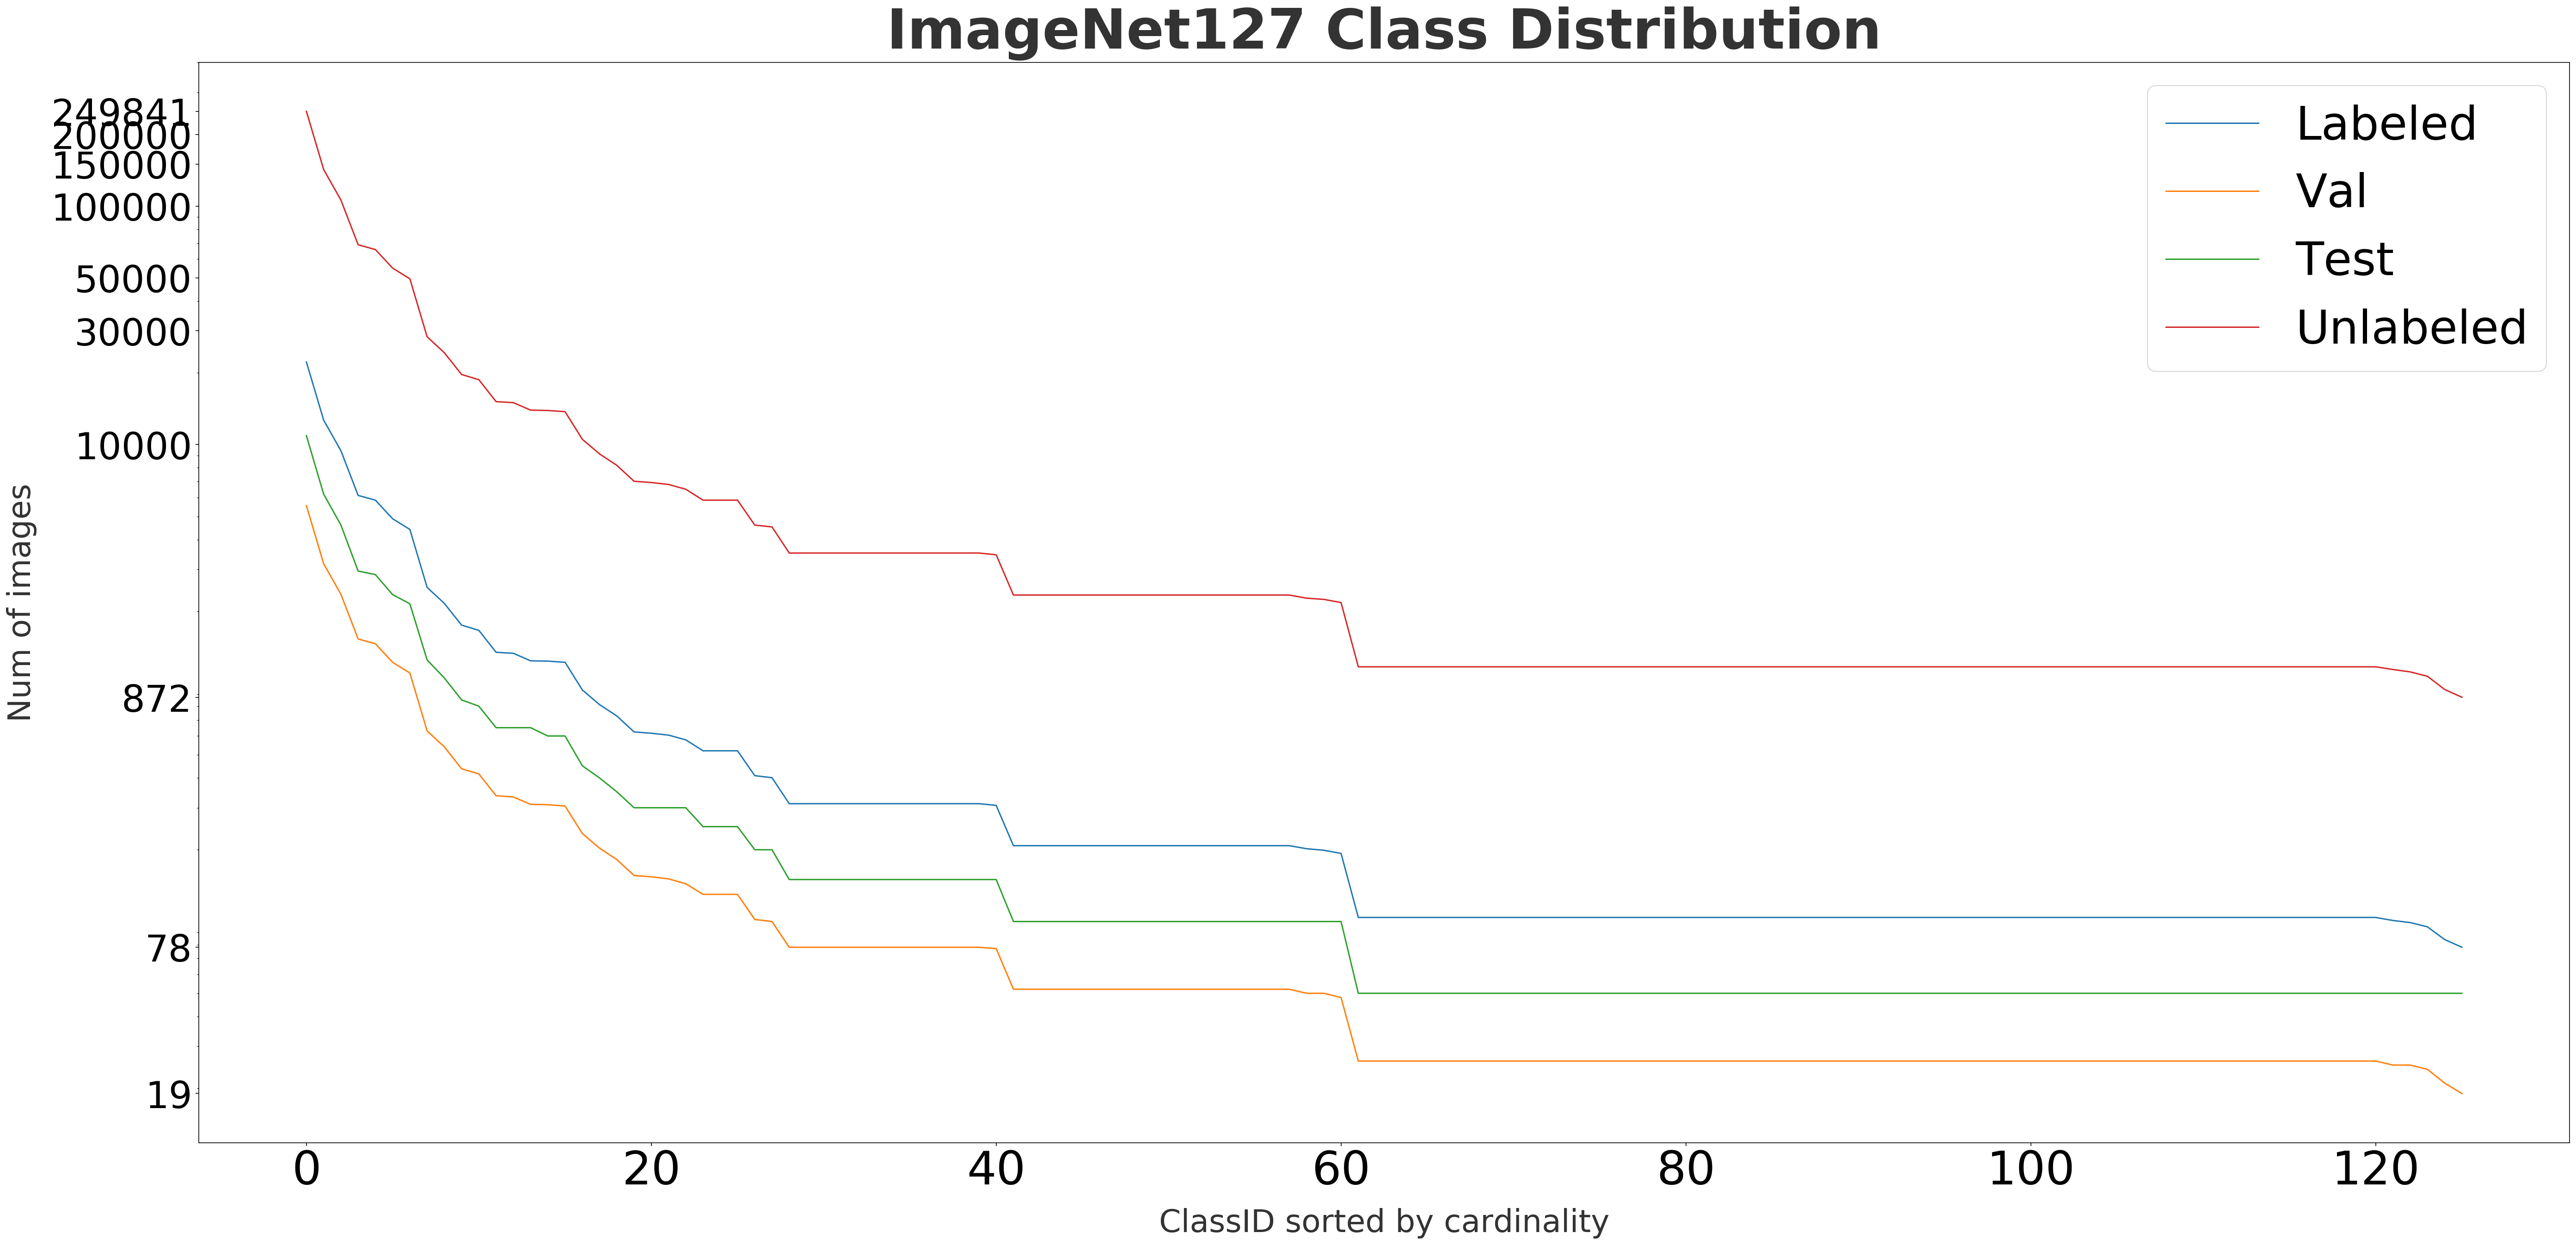

In [18]:
plot_curves({
    'Labeled' : train_perclass_count,
    'Val' : val_perclass_count,
    'Test' : test_perclass_count,
    'Unlabeled' : unlabeled_perclass_count
}, "ImageNet127 Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=True, barcolor="#43C528",
yticks=[78, 872, 10000, 30000, 50000, 100000, 150000, 200000])

In [23]:
print(test_perclass_count)

[10900, 6200, 4600, 2950, 2850, 2350, 2150, 1250, 1050, 850, 800, 650, 650, 650, 600, 600, 450, 400, 350, 300, 300, 300, 300, 250, 250, 250, 200, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


Number of class: 809
Unlabeled 23293
Train 23293
Val 22248
Test 23293
Unlabeled (min)6
Train (min)20
Val (min)6
Unlabeled (max)92
Train (max)87
Val (max)87
Classes <= 20 images: 239
Classes < 20 images: 0


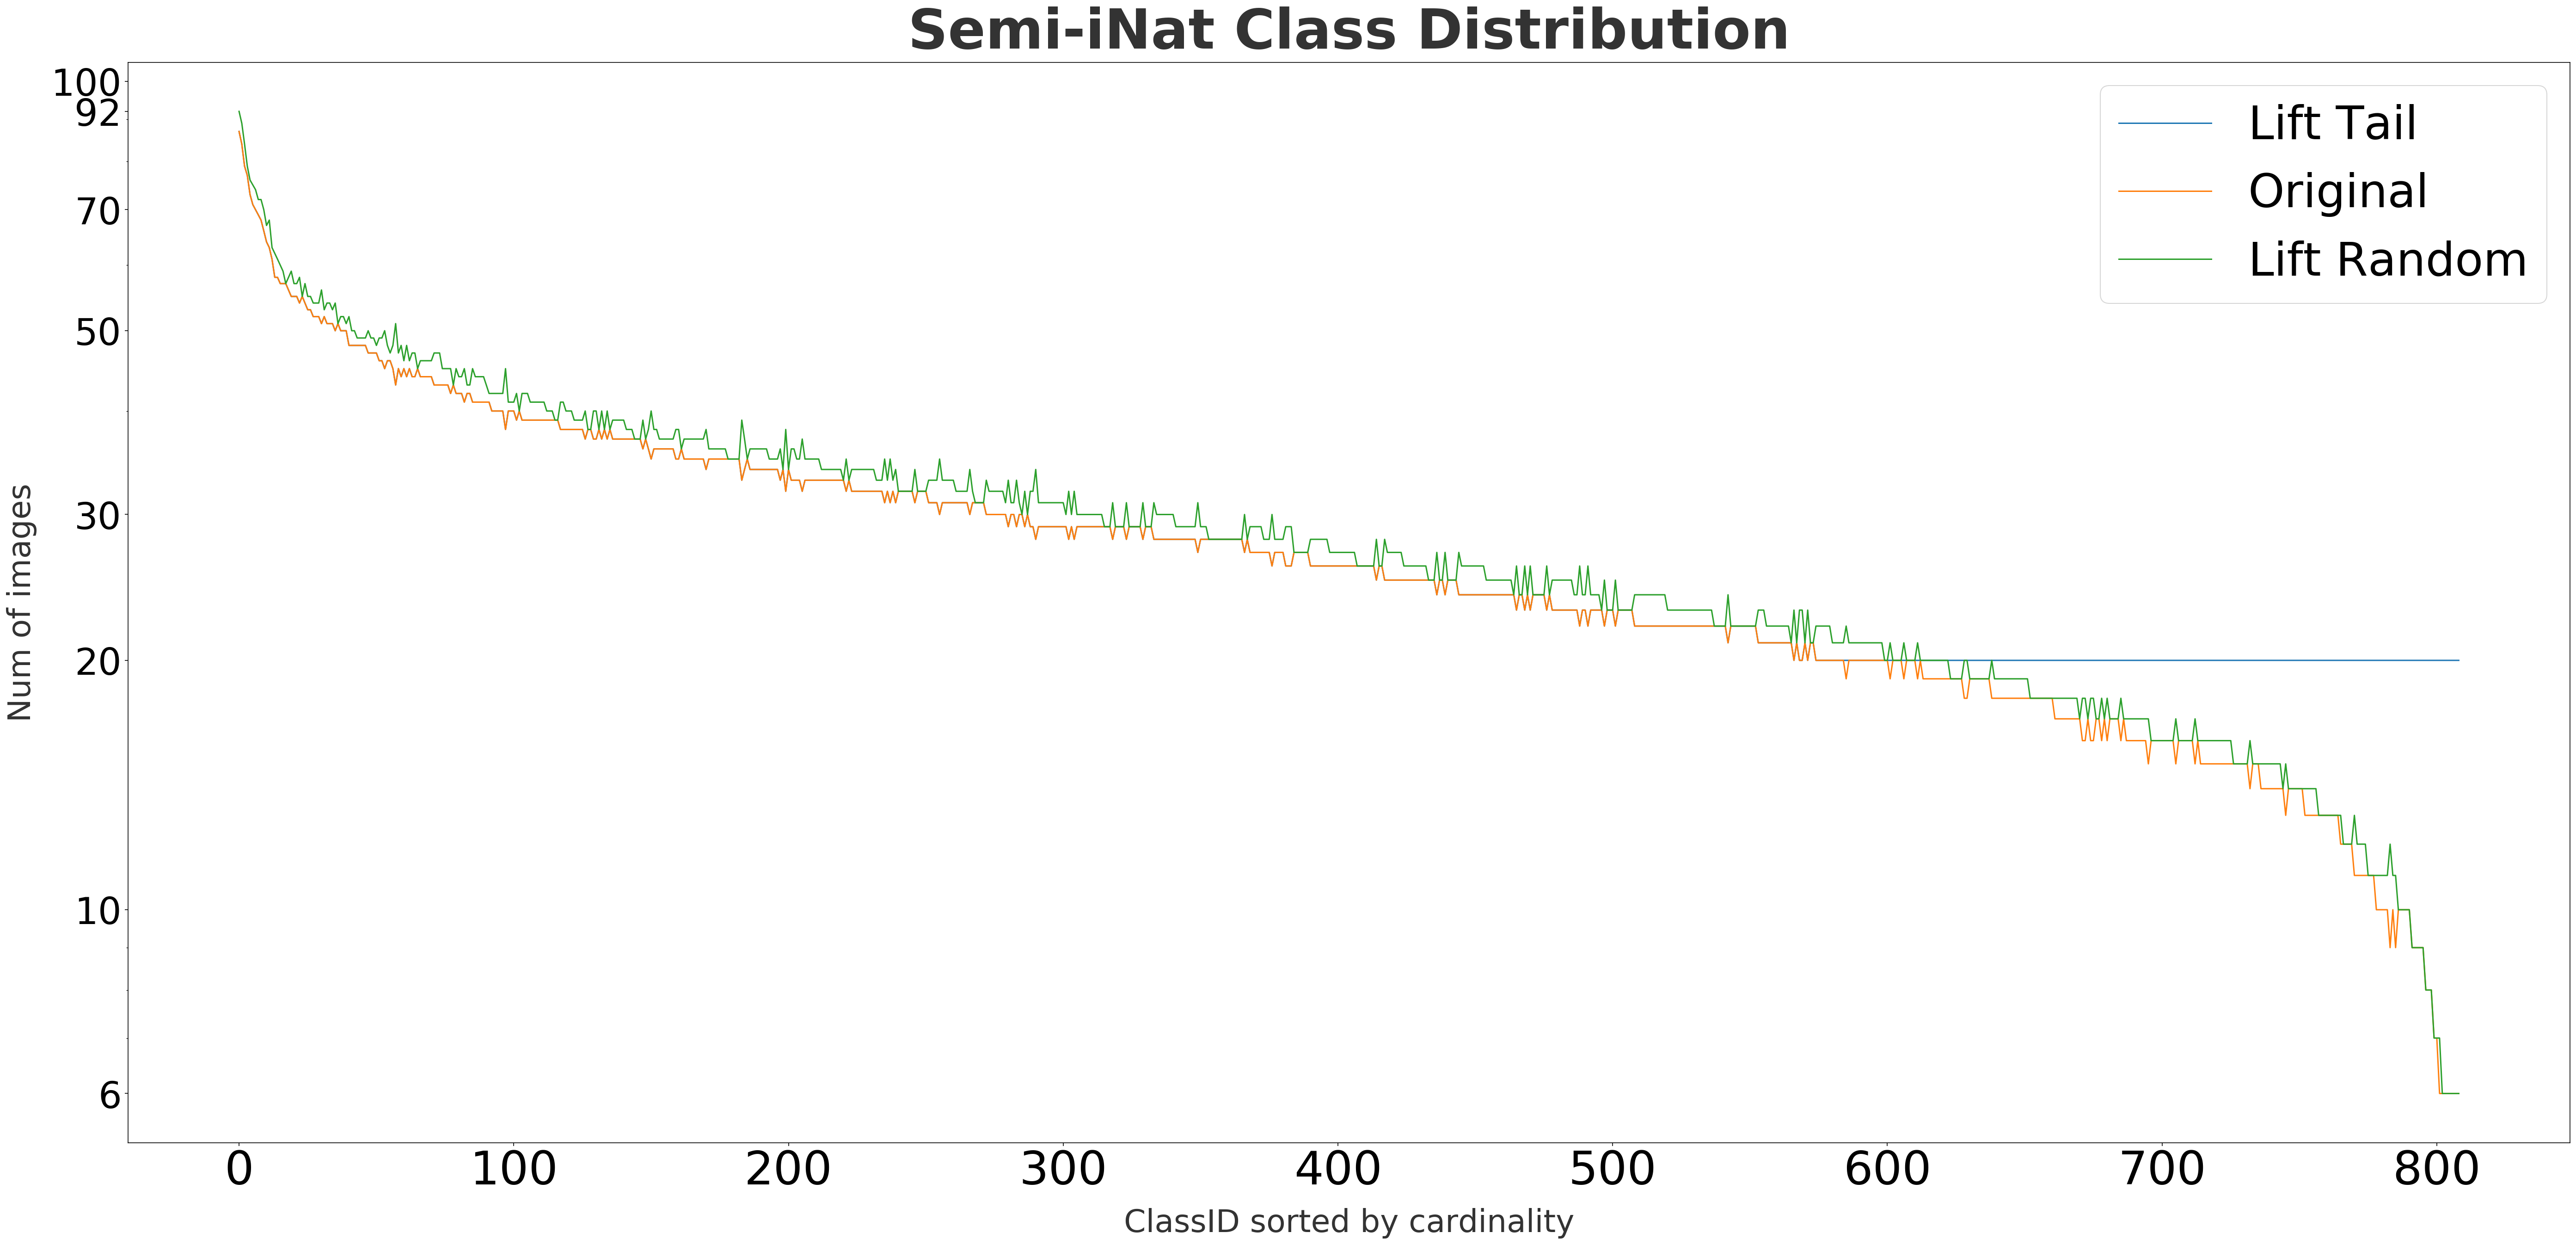

In [26]:
# after lifting the tail
semi_inat_dir = "indexes/semi_inat"
train_index_file_lift_tail = os.path.join(semi_inat_dir, "default_lift_tail", "train.csv")
train_index_file = os.path.join(semi_inat_dir, "default", "train.csv")
train_index_file_lift_random = os.path.join(semi_inat_dir, "default_lift_random", "train.csv")
train_index_file_lift_random_2 = os.path.join(semi_inat_dir, "default_lift_random", "train.csv")

train_perclass_count_lift_tail, train_perclass_count, train_perclass_count_lift_random, _ = get_perclass_count(
    train_index_file_lift_tail, train_index_file, train_index_file_lift_random, train_index_file_lift_random, threshold=20)
plot_curves({
    'Lift Tail' : train_perclass_count_lift_tail,
    'Original' : train_perclass_count,
    'Lift Random' : train_perclass_count_lift_random,
}, "Semi-iNat Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=True, barcolor="#43C528",
yticks=[10, 20, 30, 50, 70, 100])

Number of class: 126
Unlabeled 103595
Train 103595
Val 102492
Test 103595
Unlabeled (min)78
Train (min)120
Val (min)78
Unlabeled (max)22443
Train (max)22208
Val (max)22208
Classes <= 20 images: 0
Classes < 20 images: 0


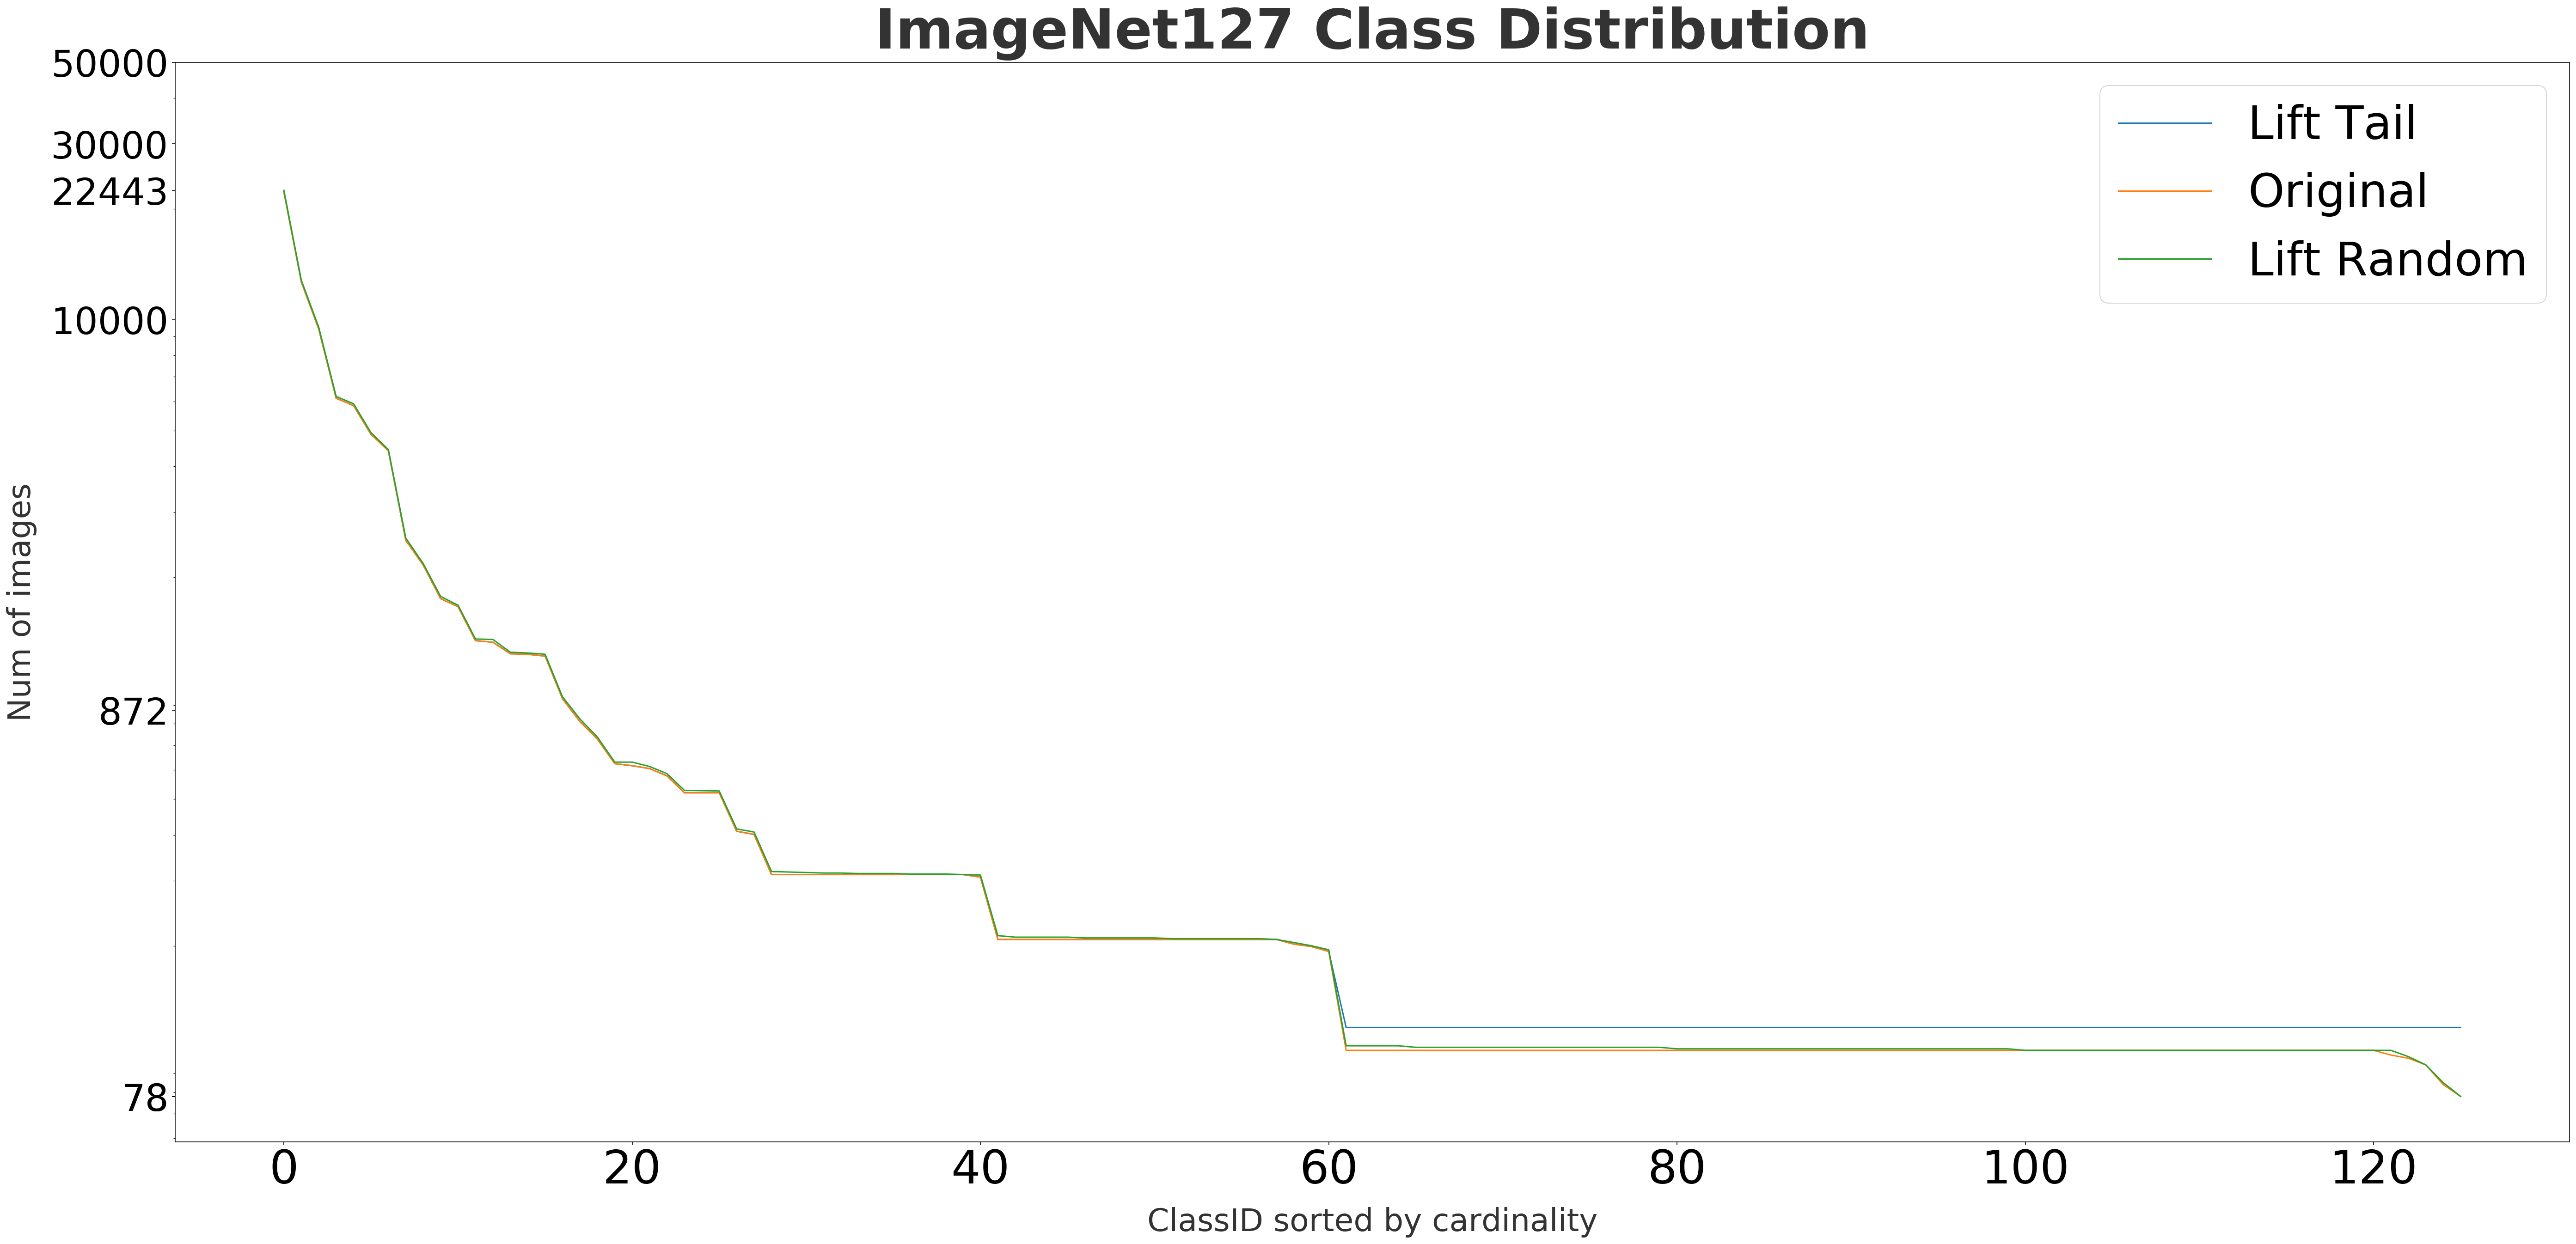

In [27]:
# after lifting the tail
imagenet127_dir = "indexes/imagenet127"
train_index_file_lift_tail = os.path.join(imagenet127_dir, "default_lift_tail", "train.csv")
train_index_file = os.path.join(imagenet127_dir, "default", "train.csv")
train_index_file_lift_random = os.path.join(imagenet127_dir, "default_lift_random", "train.csv")
train_index_file_lift_random_2 = os.path.join(imagenet127_dir, "default_lift_random", "train.csv")

train_perclass_count_lift_tail, train_perclass_count, train_perclass_count_lift_random, _ = get_perclass_count(
    train_index_file_lift_tail, train_index_file, train_index_file_lift_random, train_index_file_lift_random, threshold=20)
plot_curves({
    'Lift Tail' : train_perclass_count_lift_tail,
    'Original' : train_perclass_count,
    'Lift Random' : train_perclass_count_lift_random,
}, "ImageNet127 Class Distribution", "ClassID sorted by cardinality", "Num of images",  log_scale=True, barcolor="#43C528",
yticks=[78, 872, 10000, 30000, 50000])